## Logistic map and Lyapunov exponent

We will plot the bifurcation diagram of a chaotic dynamical system. 
We will learn what is Lyapunov exponent and what is chaos. We will understand that certain alhorithms, when using iterations, are extremely sensitive to initial conditions and results might not even be deterministic once chaos appears.


A chaotic dynamical system is highly sensitive to initial conditions; small perturbations at any given time yield completely different trajectories. The trajectories of a chaotic system tend to have complex and unpredictable behaviors.

Many real-world phenomena are chaotic, particularly those that involve nonlinear interactions among many agents (complex systems). Examples can be found in meteorology, economics, biology, and other disciplines.

In this recipe, we will simulate a famous chaotic system: the **logistic map**. This is an archetypal example of how chaos can arise from a very simple nonlinear equation. The logistic map models the evolution of a population, taking into account both reproduction and density-dependent mortality (starvation).

We will draw the system's bifurcation diagram, which shows the possible long-term behaviors (equilibria, fixed points, periodic orbits, and chaotic trajectories) as a function of the system's parameter. We will also compute an approximation of the system's Lyapunov exponent, characterizing the model's sensitivity to initial conditions.


The **logistic map** is defined by the recursive application of the logistic function:

$$x_{n+1}= r x_n (1-x_n)$$

It is discrete demographic model, where $x_n$ is a number between zero and one, which represents the ratio of existing population to the maximum possible population.

The population is expected to increase at a rate proportional to the current population when the population size is small. The proportionality is a parameter $r$. However, when population grows large it starts to overuse available resources, and starvation occurs, hence the growth rate will decrease at a rate proportional to the value obtained by taking the theoretical "carrying capacity" of the environment (here 1.0) less the current population.


The usual values of interest for the parameter $r$ are those in the interval $[0,4]$, so that $x_n$ remains bounded on $[0,1]$. If $r>4$ the negative population sizes occur. 

Initial condition ($x_0$) is not very important. We will take some small number, like $10^{-5}$. 

Notice that **logistic map**  could also be expressed as $f(x) = r x (1-x)$ and we are looking for $f(f(f(...f(x_0)...)))$.

We will also calculate the **Lyapunov exponent**, which characterizes the rate of separation of infinitesimally close trajectories.

Two trajectories in phase space with initial separation $\delta Z_0$ 
diverge at a rate given by 
$$|\delta Z(t)|\approx e^{\lambda t}|\delta Z_0|.$$ 
If $\lambda>0$, the system is chaotic, because very small change in initial conditions leads to exponentially different solution.

The formal definition of **Lyapunov exponent** is
$$\lambda=\lim_{t\rightarrow \infty}\lim_{|\delta Z_0|\rightarrow 0}\frac{1}{t}\ln(\frac{|\delta Z(t)|}{\delta Z_0})$$

For discrete map $x_{n+1}=f(x_n)$

$$\delta x_{n+1} \equiv x^1_{n+1}-x^0_{n+1} = f(x^1_{n})-f(x^0_{n}) \approx f'(x_{n})\delta x_n \approx \delta x_0 \prod_{i=0}^n f'(x_i) $$

After taking the logarithm, and dividing by the number of steps, we get
$$\lambda = \lim_{n\rightarrow\infty}\frac{1}{n}\ln(\frac{\delta x_{n}}{\delta x_0})=\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=0}^{n-1} \ln(f'(x_i))$$

For logistic map, the Lyapunov exponent is hence:
$$\lambda =\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=0}^{n-1} \ln(r (1-2 x_i))$$

For the algorithm, we will iterate the logistic function `Nitt` times, and save the last few points (`Nsave`), which will be displayed later.

The parameter `r` will be discretized with linear mesh of `Npoints` between `ext[0]` and `ext[1]`.

Because the points corresponding to different `r` require exactly the same number of iterations, and also the same set of operations, it is convenient to do them in parallel. We will thus create an array of points `r[0:Npoints]`, and results will be stored in `data[0:Nsave,0:Npoints]`.

Here is the code:

In [30]:
import numpy as np
from numba import njit

@njit 
def logistic(r, x):
    return r * x * (1 - x)

@njit
def GiveFewPoints(ext, Npoints, Nitt, Nsave):
    # r is array of Npoints, hence we will 
    # iterate all points simultaneously
    r = np.linspace(ext[0],ext[1], Npoints)
    # initialize storage for all points we will plot.
    data = np.zeros((Nsave,Npoints))
    # Lyapunov 
    lyapunov = np.zeros(Npoints)
    x        = np.ones(Npoints)*1e-5
    for i in range(Nitt):
        x = logistic(r, x)
        # We compute the partial sum of the
        # Lyapunov exponent.
        lyapunov += np.log(np.abs(r - 2.0 * r * x))
        # We display the bifurcation diagram.
        if i >= (Nitt-Nsave):
            data[i-(Nitt-Nsave),:]=x
    return (r, data, lyapunov/Nitt)

We call the anove function with `Npoints=1000` and very large number of iterations `Nitt=10000`. We will save the last `Nsave=300` generations. 

In [35]:
ext=np.array([1,4])
(r, data, lyapunov) = GiveFewPoints(ext, 1000, 10000, 300)

We will plot with two panels. They will share the x-axis, i.e., the same `r` mesh. We will also specify the size of fig.

The first panel will show logistic map, which are the last 300 points after very large number of iterations. The second is the Lyapunov exponent.

To select color, we give string `'k'` and comma means plot only dots. We also give them some transparency `alpha=0.25`.


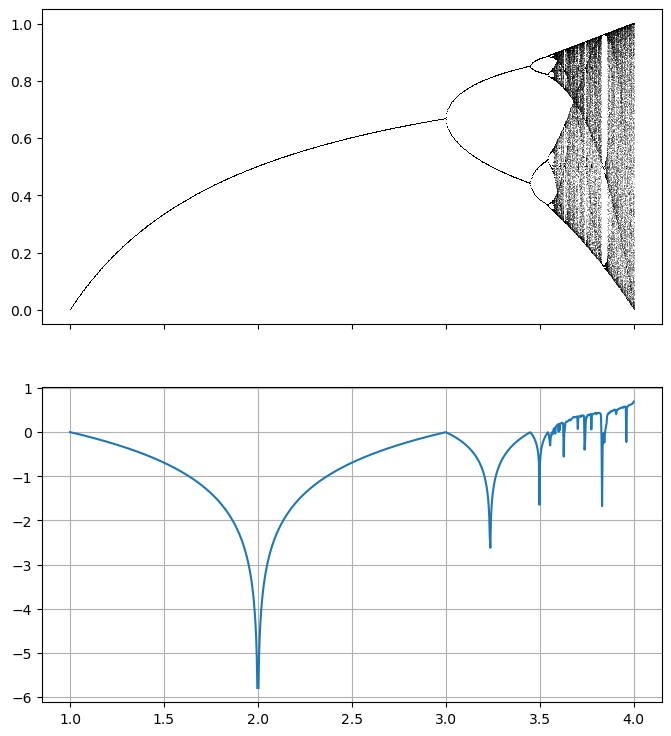

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 9))

for i in range(np.shape(data)[0]):
    ax1.plot(r, data[i,:], 'k,', alpha=0.25)

ax2.plot(r,lyapunov)
ax2.grid()

Clearly the system is deterministic up to $r=3$, and between $3<r<3.44949$ it can reach two values (double period),  for $3.344949<r<3.54409$ it has 4 values, at $r=3.56995$ there is continuum of values allowed, and Lyapunov exponent becomes positive.

Most values of $r$ beyond 3.56995 exhibit chaotic behaviour, but there are still certain isolated ranges of $r$ that show non-chaotic behavior; these are sometimes called islands of stability.

### Homework 1:

Compute Lyapunov exponent for Mandelbrot Set, and instead of plotting number of iterations, plot Lyapunov exponent.
Ideas for the solution can be found here <a href="https://en.wikibooks.org/wiki/Fractals/Iterations_in_the_complex_plane/Mandelbrot_set_interior">wikibooks.org</a>